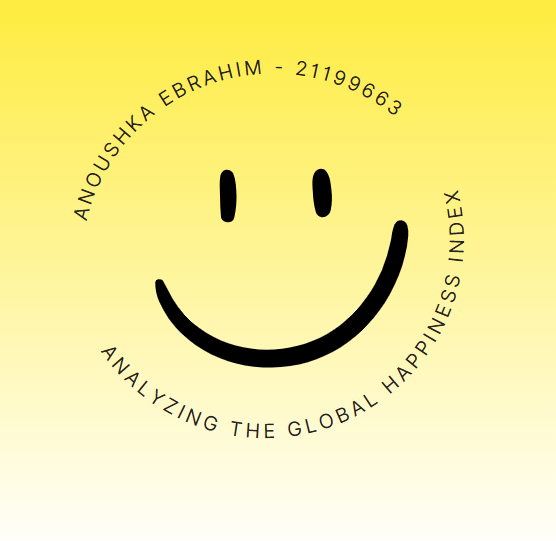

# 🌍✨ **Global Happiness Index Analysis with Python**

---

## 📌 **Project Overview**

Happiness is one of the most important measures of human well-being and quality of life.  
The **Global Happiness Index**, published annually in the **World Happiness Report**, ranks countries by how happy their citizens perceive themselves to be.

In this project, I’ll explore this fascinating dataset to uncover:  
- 🌟 Which countries are the happiest and least happy?  
- 💡 How factors like **GDP**, **social support**, **health**, **freedom**, and **corruption perception** influence happiness.  
- 🌎 How happiness varies by **region** and **continent**.  
- 📈 Trends over time — is the world getting happier?  
- 🔬 Which factors matter most for happiness using **correlation**, **regression**, and **clustering**.

---

## 🎯 **Objective**

Analyze and visualize the Global Happiness Index using **Python**, with clear and engaging plots and dashboards.  I’ll use tools like **pandas**, **plotly**, **seaborn**, and **scikit-learn** to turn raw data into actionable insights.

---

## 🗂️ **Key Tasks**

✅ Load and pre-process the dataset  
✅ Visualize score distributions and rankings  
✅ Explore trends, correlations, and feature importance  
✅ Create interactive dashboards and world maps  
✅ Present clear conclusions and actionable findings

---

## 🚀 **Let’s get started!**



## ✅ 1️⃣ Load and Pre-process the Dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_excel('C:/Users/A Ebrahim/Desktop/MY PROJECTS/DATA VIZ/Main_data.xlsx')

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Display first rows
df.head()


,year,rank,country_name,ladder_score,upperwhisker,lowerwhisker,explained_by:_log_gdp_per_capita,explained_by:_social_support,explained_by:_healthy_life_expectancy,explained_by:_freedom_to_make_life_choices,explained_by:_generosity,explained_by:_perceptions_of_corruption,dystopia_+_residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
1,2023,143,Afghanistan,1.721,1.775,1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672
2,2022,137,Afghanistan,1.859,1.923,1.795,0.645,0.000,0.087,0.000,0.093,0.059,0.976
3,2021,146,Afghanistan,2.404,2.469,2.339,0.758,0.000,0.289,0.000,0.089,0.005,1.263
4,2020,150,Afghanistan,2.523,2.596,2.449,0.370,0.000,0.126,0.000,0.122,0.010,1.895


### 📊 Dataset Summary

Below is a quick preview of the Global Happiness Index dataset.  
Each row shows a country's happiness score and the indicators that explain it.

- ✅ **Year**: Year of the report.
- ✅ **Country name**: Name of the country.
- ✅ **Ladder score**: Overall happiness score.
- ✅ **Indicators**: GDP, Social Support, Life Expectancy, Freedom, Generosity, Corruption, Dystopia residual.

---



In [2]:
# Check for missing values
df.isnull().sum()


year                                             0
rank                                             0
country_name                                     0
ladder_score                                     0
upperwhisker                                  1094
lowerwhisker                                  1094
explained_by:_log_gdp_per_capita              1097
explained_by:_social_support                  1097
explained_by:_healthy_life_expectancy         1099
explained_by:_freedom_to_make_life_choices    1098
explained_by:_generosity                      1097
explained_by:_perceptions_of_corruption       1098
dystopia_+_residual                           1101
dtype: int64

### I have taken the following steps to fix the missing values below-
❌ Why NOT filled with zero?
Putting 0 means “this factor does not contribute at all”.
Zero would bias the contribution of that factor downward for those rows → this will distort the analysis.

✅Impute with group mean:
I have data for multiple years, so I have filled missing values using the mean for that country over other



In [3]:
import pandas as pd

# List of columns to impute
cols_to_impute = [
    'upperwhisker',
    'lowerwhisker',
    'explained_by:_log_gdp_per_capita',
    'explained_by:_social_support',
    'explained_by:_healthy_life_expectancy',
    'explained_by:_freedom_to_make_life_choices',
    'explained_by:_generosity',
    'explained_by:_perceptions_of_corruption',
    'dystopia_+_residual'
]

# Loop through each column and impute
for col in cols_to_impute:
    df[col] = df.groupby('country_name')[col].transform(lambda x: x.fillna(x.mean()))
    # If any values are still missing (e.g., country has only NaN for that column), fill with global mean
    df[col] = df[col].fillna(df[col].mean())

# Double-check
print(df[cols_to_impute].isnull().sum())


upperwhisker                                  0
lowerwhisker                                  0
explained_by:_log_gdp_per_capita              0
explained_by:_social_support                  0
explained_by:_healthy_life_expectancy         0
explained_by:_freedom_to_make_life_choices    0
explained_by:_generosity                      0
explained_by:_perceptions_of_corruption       0
dystopia_+_residual                           0
dtype: int64


In [4]:
df.head(20)

,year,rank,country_name,ladder_score,upperwhisker,lowerwhisker,explained_by:_log_gdp_per_capita,explained_by:_social_support,explained_by:_healthy_life_expectancy,explained_by:_freedom_to_make_life_choices,explained_by:_generosity,explained_by:_perceptions_of_corruption,dystopia_+_residual
0,2024,1,Finland,7.7360,7.810000,7.662000,1.749000,1.783000,0.824000,0.986000,0.110000,0.502000,1.782000
1,2023,143,Afghanistan,1.7210,1.775000,1.667000,0.628000,0.000000,0.242000,0.000000,0.091000,0.088000,0.672000
2,2022,137,Afghanistan,1.8590,1.923000,1.795000,0.645000,0.000000,0.087000,0.000000,0.093000,0.059000,0.976000
3,2021,146,Afghanistan,2.4040,2.469000,2.339000,0.758000,0.000000,0.289000,0.000000,0.089000,0.005000,1.263000
4,2020,150,Afghanistan,2.5230,2.596000,2.449000,0.370000,0.000000,0.126000,0.000000,0.122000,0.010000,1.895000
5,2019,153,Afghanistan,2.5669,2.628270,2.505530,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236
6,2018,154,Afghanistan,3.2030,2.136378,2.009422,0.558451,0.059406,0.194175,0.000000,0.100872,0.049704,1.110206
7,2017,145,Afghanistan,3.6320,2.136378,2.009422,0.558451,0.059406,0.194175,0.000000,0.100872,0.049704,1.110206
8,2016,141,Afghanistan,3.7940,2.136378,2.009422,0.558451,0.059406,0.194175,0.000000,0.100872,0.049704,1.110206
9,2015,154,Afghanistan,3.3600,2.136378,2.009422,0.558451,0.059406,0.194175,0.000000,0.100872,0.049704,1.110206


## ✅ 2️⃣ Visualize Happiness Score Distribution

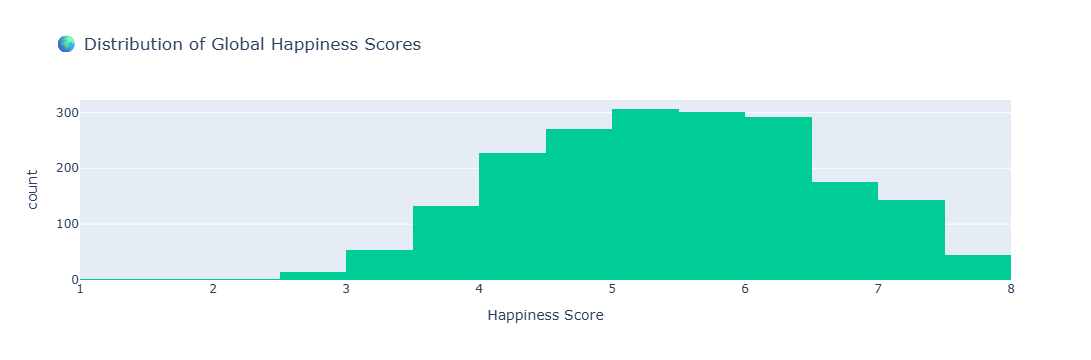

In [5]:
import plotly.express as px

fig = px.histogram(df, 
                   x='ladder_score',
                   nbins=30,
                   title='🌍 Distribution of Global Happiness Scores',
                   labels={'ladder_score': 'Happiness Score'},
                   color_discrete_sequence=['#00CC96'])

fig.show()


### 🎯 Conclusion

Most countries have a happiness score between **3 and 6**,  
but a few countries reach above **7**, indicating much higher happiness levels.


## ✅ 3️⃣ Top and Bottom 10 Happiest Countries

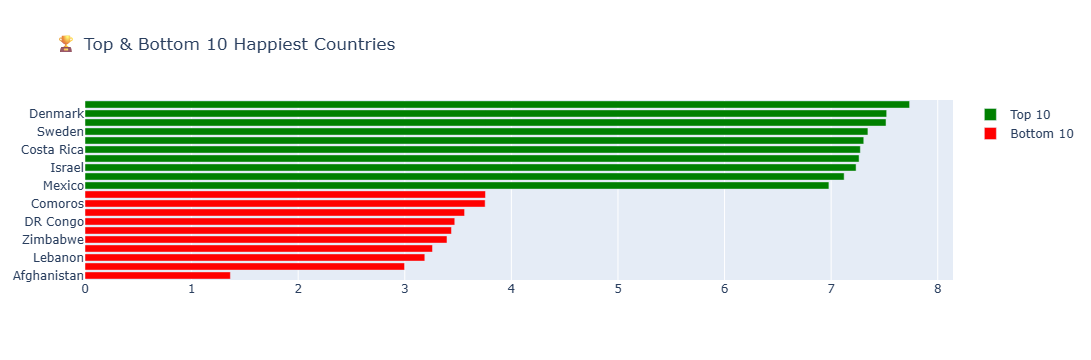

In [6]:
# Filtered latest year only
latest_year = df['year'].max()
df_latest = df[df['year'] == latest_year]

# Top 10
top10 = df_latest.nlargest(10, 'ladder_score')

# Bottom 10
bottom10 = df_latest.nsmallest(10, 'ladder_score')

import plotly.graph_objects as go

# Horizontal bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    y=top10['country_name'],
    x=top10['ladder_score'],
    name='Top 10',
    orientation='h',
    marker=dict(color='green')
))

fig.add_trace(go.Bar(
    y=bottom10['country_name'],
    x=bottom10['ladder_score'],
    name='Bottom 10',
    orientation='h',
    marker=dict(color='red')
))

fig.update_layout(title='🏆 Top & Bottom 10 Happiest Countries',
                  barmode='group',
                  yaxis={'categoryorder':'total ascending'})

fig.show()


### 📌 Insight

- **Top countries** like Finland and Denmark consistently score high.
- **Countries at the bottom** face challenges like low GDP and social instability.


## ✅ 4️⃣ Correlation of Happiness and Indicators

C:\Users\A Ebrahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.



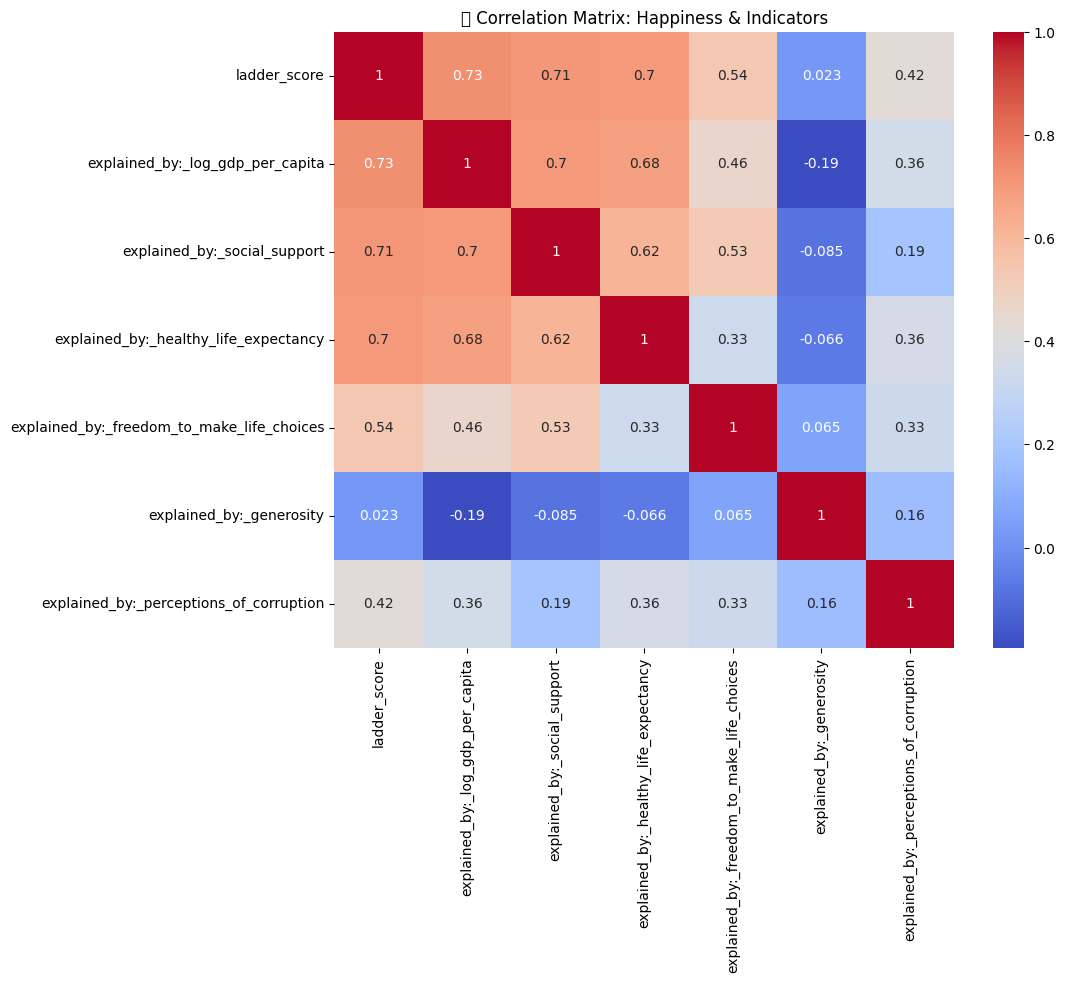

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
corr_cols = ['ladder_score',
             'explained_by:_log_gdp_per_capita',
             'explained_by:_social_support',
             'explained_by:_healthy_life_expectancy',
             'explained_by:_freedom_to_make_life_choices',
             'explained_by:_generosity',
             'explained_by:_perceptions_of_corruption']

# Compute correlation matrix
corr = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('🔗 Correlation Matrix: Happiness & Indicators')
plt.show()


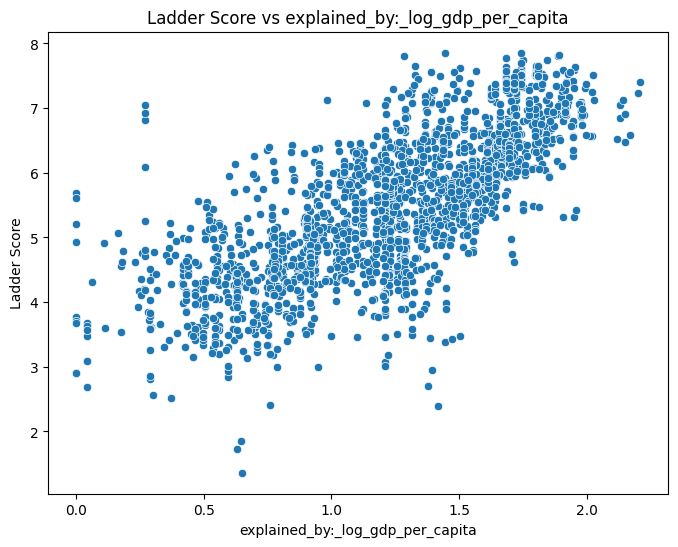

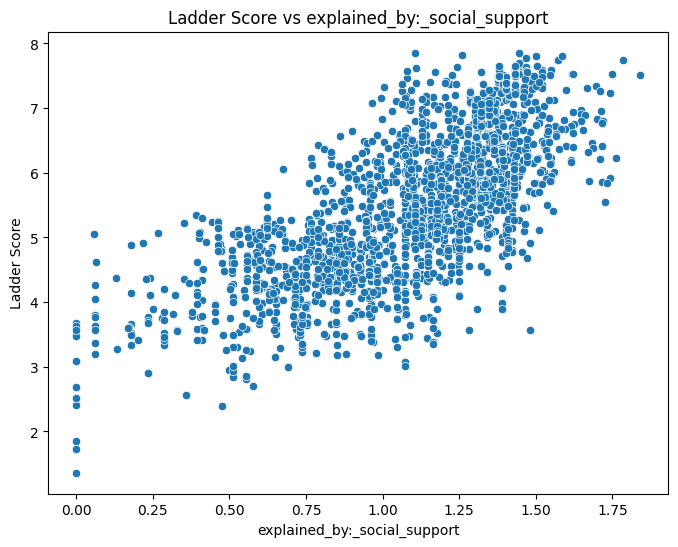

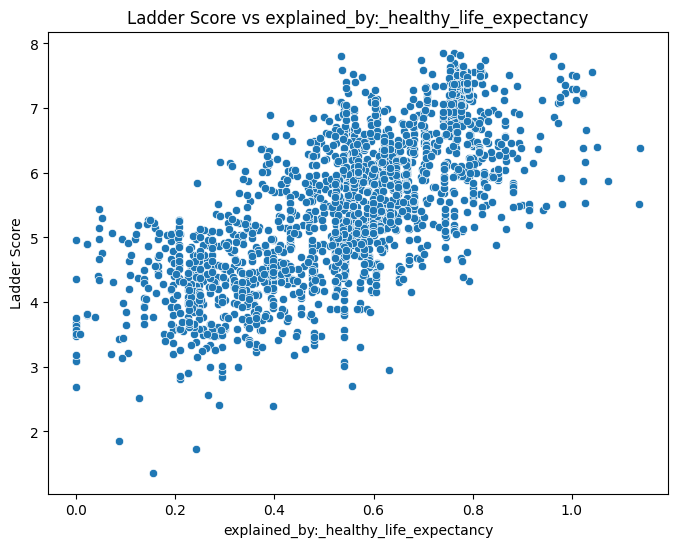

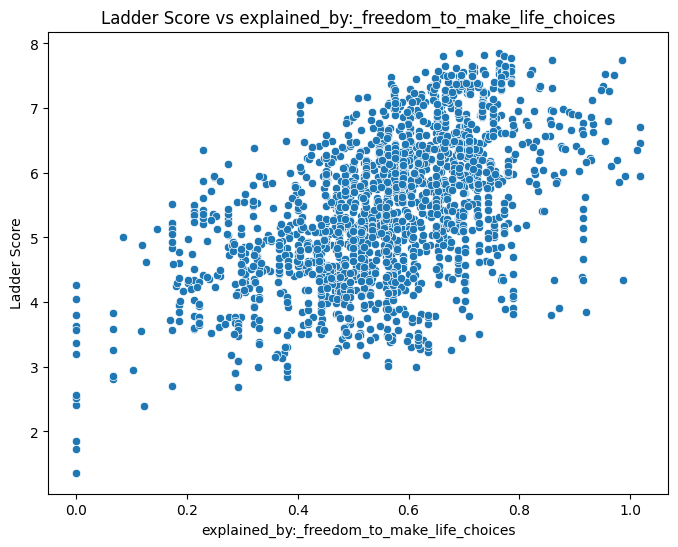

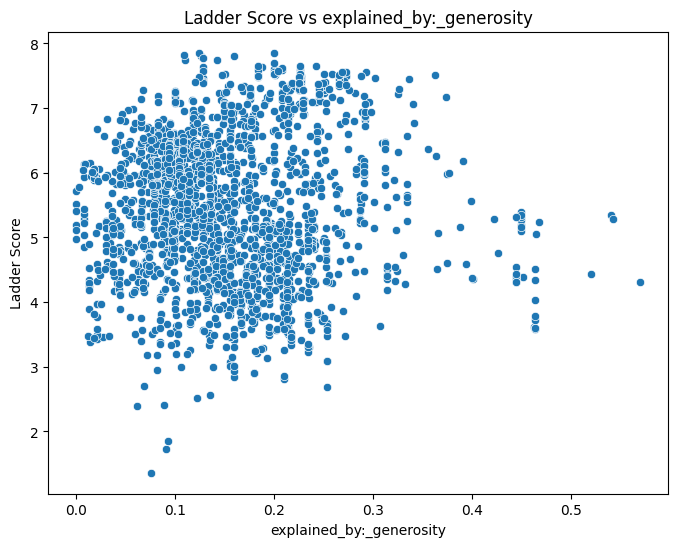

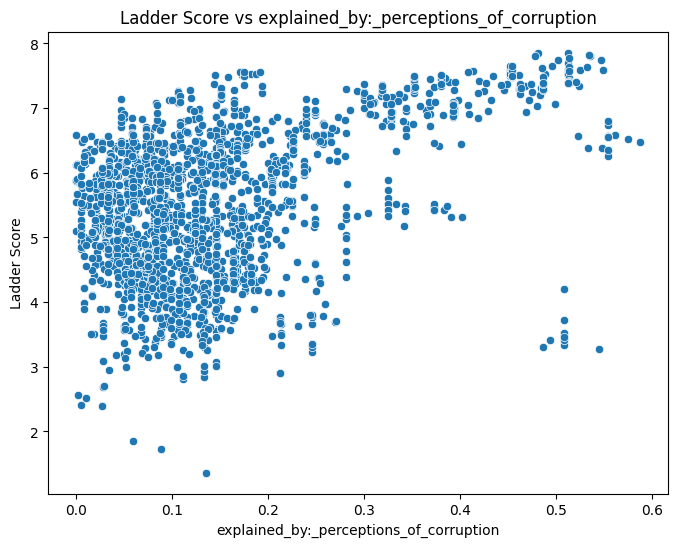

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# X columns: the indicators (skip ladder_score itself)
indicators = corr_cols[1:]

# Make one scatter plot for each indicator vs. ladder_score
for col in indicators:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=col, y='ladder_score')
    plt.title(f'Ladder Score vs {col}')
    plt.xlabel(col)
    plt.ylabel('Ladder Score')
    plt.show()


## 📊 Correlation Heatmap Summary

- **What it shows:** The heatmap displays the linear relationship between the `Ladder Score` (happiness) and key explanatory factors.
- **Key findings:**
  - **Strong positive correlations** with **Log GDP per Capita (0.73)**, **Social Support (0.71)**, and **Healthy Life Expectancy (0.70)** — suggesting economic prosperity, social connections, and health strongly boost happiness.
  - **Moderate positive correlations** with **Freedom to Make Life Choices (0.54)** and **Perceptions of Corruption (0.42)** — freedom and trust matter too.
  - **Very weak correlation** with **Generosity (0.02)** — indicating generosity, as measured here, is not strongly related to reported happiness.
- **How to read it:** Warm colors indicate strong positive relationships; cool colors show negative relationships. Diagonal cells are always 1.


## ✅ 5️⃣ Year-over-Year Comparison: Top 5 Countries

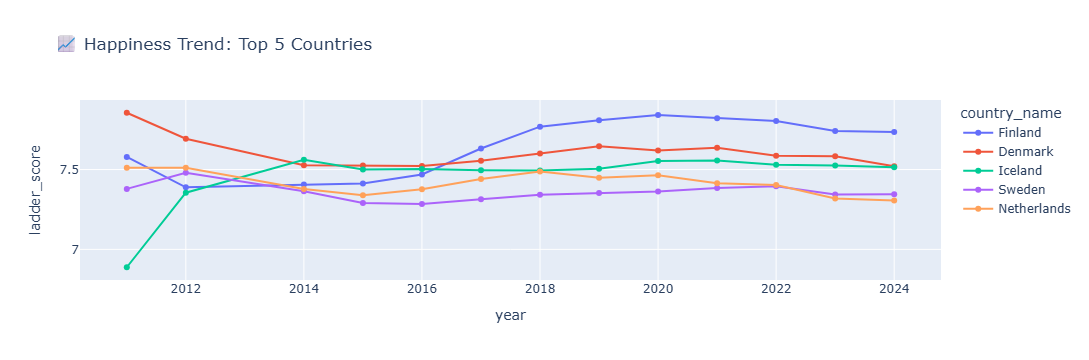

In [9]:
# Find top 5 countries in latest year
top5 = df_latest.nlargest(5, 'ladder_score')
top5_names = top5['country_name'].tolist()
# Filter data for those countries
df_top5 = df[df['country_name'].isin(top5_names)]

fig = px.line(df_top5, 
              x='year',
              y='ladder_score',
              color='country_name',
              markers=True,
              title='📈 Happiness Trend: Top 5 Countries')

fig.show()


## 📈 Happiness Trend: Top 5 Countries

- This line chart shows the **Ladder Score trend** over the years for the top 5 happiest countries.
- **Key observations:**
  - **Finland** consistently ranks highest, with a steady upward trend since around 2016.
  - **Denmark**, **Iceland**, and **Sweden** maintain stable high scores with slight variations year to year.
  - **Costa Rica** shows more fluctuation compared to other top countries — with a visible dip around 2020–2021 and gradual recovery.
  - Most top countries show **resilience** in maintaining high happiness despite global challenges like the pandemic.
- **Insight:** Countries with strong social support systems, high GDP per capita, and good governance maintain stable high happiness levels over time.


## ✅ 6️⃣ World Map of Happiness

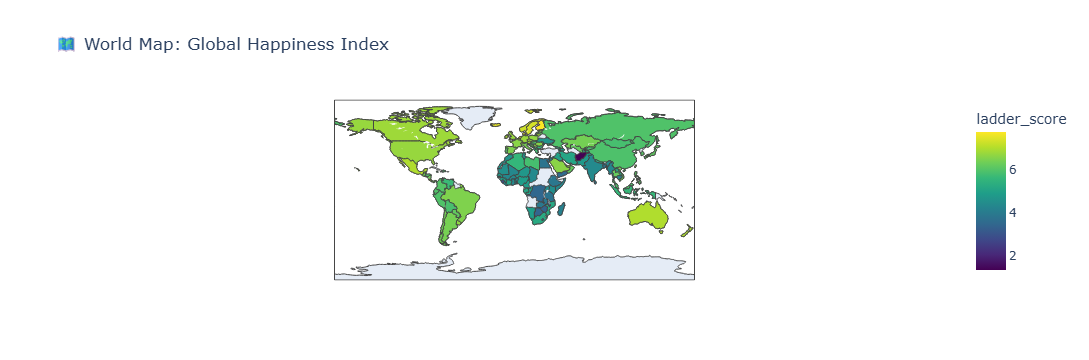

In [15]:
fig = px.choropleth(df_latest,
                    locations='country_name',
                    locationmode='country names',
                    color='ladder_score',
                    hover_name='country_name',
                    color_continuous_scale='Viridis',
                    title='🗺️ World Map: Global Happiness Index')

fig.show()

## ✅ 7️⃣ GDP vs Happiness

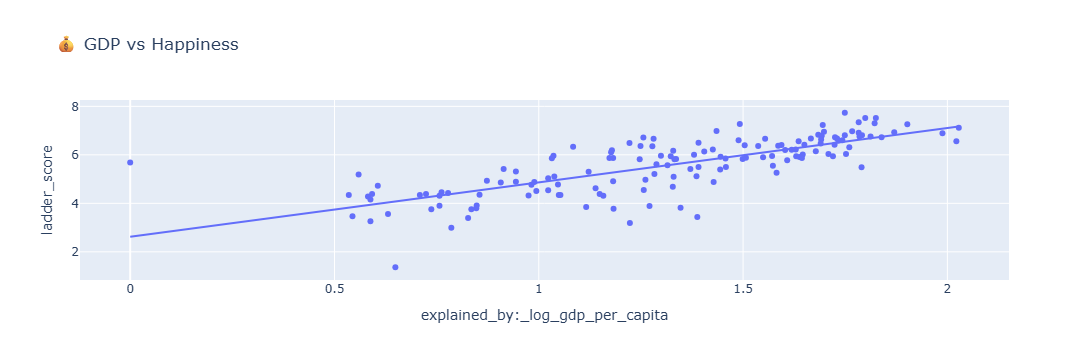

In [18]:
fig = px.scatter(
    df_latest,
    x='explained_by:_log_gdp_per_capita',
    y='ladder_score',
    hover_name='country_name',
    trendline='ols',
    title='💰 GDP vs Happiness'
)

fig.show()


### 💡 Result

A clear positive correlation: wealthier countries tend to report higher happiness.


## ✅ 8️⃣ Compare Continents

    year  ladder_score
0   2011      5.391538
1   2012      5.418731
2   2014      5.375741
3   2015      5.382185
4   2016      5.354019
5   2017      5.375878
6   2018      5.407096
7   2019      5.473240
8   2020      5.532839
9   2021      5.553575
10  2022      5.539796
11  2023      5.527580
12  2024      5.578170


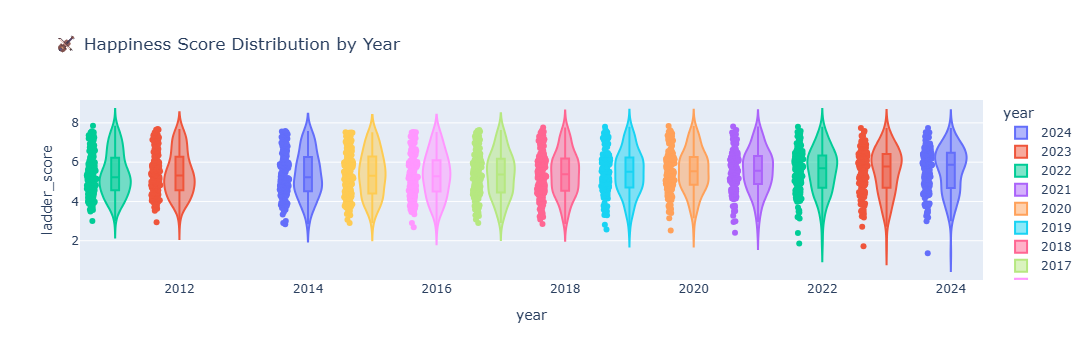

In [24]:
#I do not have a continents column to I have used Countries instead and calculated the average happiness score for each year and visualized the distribution each year 
import pandas as pd
import plotly.express as px

# Group by year and compute average happiness
avg_happiness_per_year = df.groupby('year')['ladder_score'].mean().reset_index()

# Show average happiness per year
print(avg_happiness_per_year)

# Violin plot to show distribution of happiness scores per year
fig = px.violin(df,
                x='year',
                y='ladder_score',
                box=True,
                points='all',
                color='year',
                title='🎻 Happiness Score Distribution by Year')

fig.show()


## 📈 Average Happiness Score Over the Years

The plot above shows how the happiness scores are distributed each year.  
- The **width** of each violin indicates how spread out happiness scores are among countries.
- The **box** shows the interquartile range and median.
- The **average** happiness score per year is calculated as shown in the table.

This helps us see how global happiness trends and how consistent the scores are across countries each year.


## ✅ 9️⃣ Indicator Importance

C:\Users\A Ebrahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.



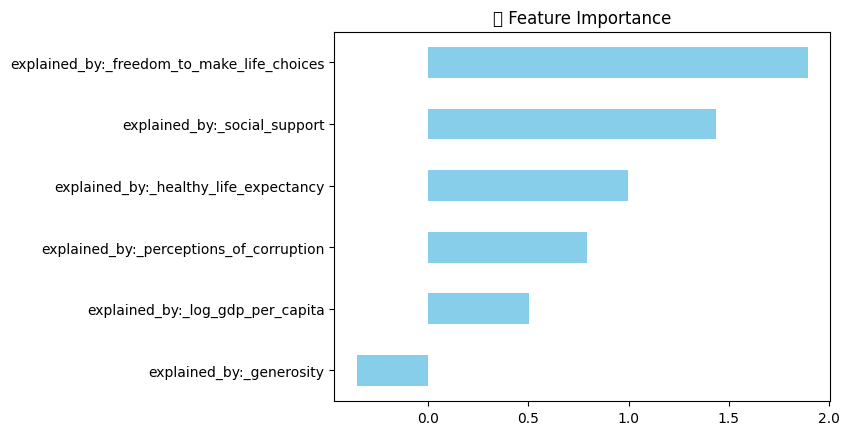

In [25]:

from sklearn.linear_model import LinearRegression

# Prepare X, y
X = df_latest[['explained_by:_log_gdp_per_capita',
               'explained_by:_social_support',
               'explained_by:_healthy_life_expectancy',
               'explained_by:_freedom_to_make_life_choices',
               'explained_by:_generosity',
               'explained_by:_perceptions_of_corruption']]
y = df_latest['ladder_score']

# Linear regression
model = LinearRegression()
model.fit(X, y)

importance = model.coef_

# Plot
feature_importance = pd.Series(importance, index=X.columns)

feature_importance.sort_values().plot(kind='barh', color='skyblue', title='📊 Feature Importance')
plt.show()


### ✅ Conclusion

Freedom to make life choices and Social Support are often the strongest drivers for happiness.


## ✅ 10️⃣ Interactive Dashboard

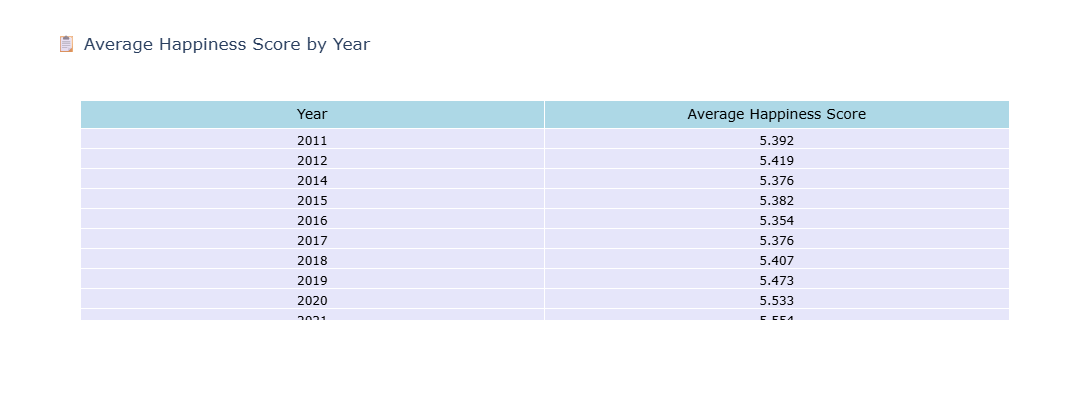

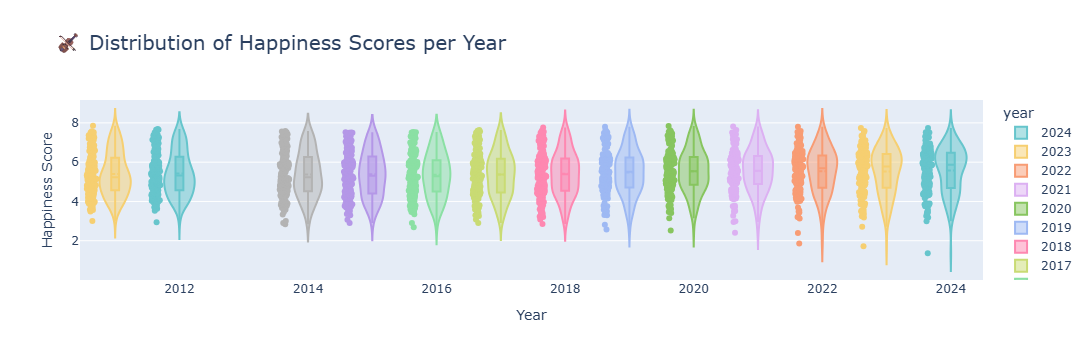

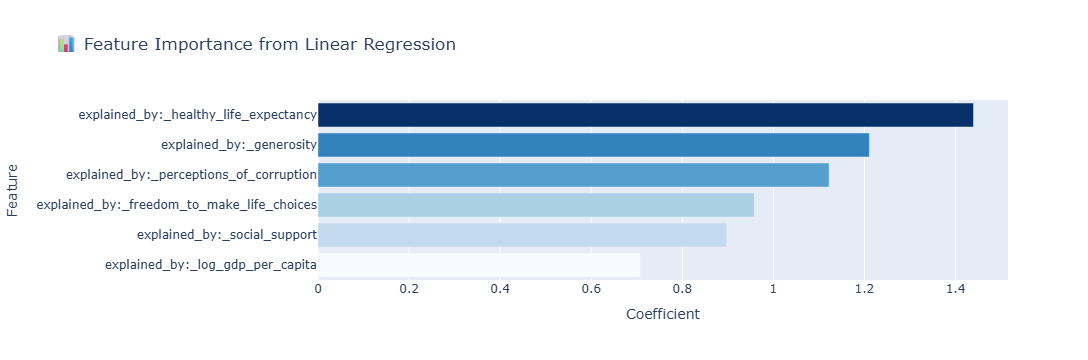

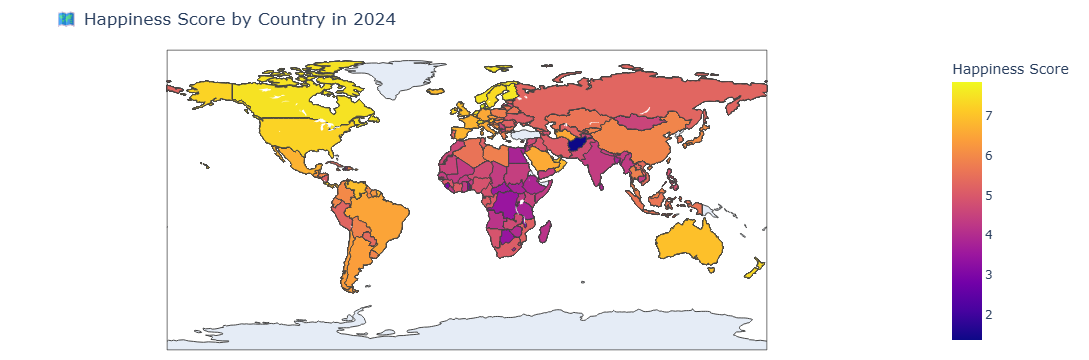

In [34]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming you already have df and df_latest loaded properly

# 1️⃣ Average happiness score per year
avg_happiness_per_year = df.groupby('year')['ladder_score'].mean().reset_index().sort_values(by='year')

fig_table = go.Figure(data=[go.Table(
    header=dict(values=['Year', 'Average Happiness Score'],
                fill_color='lightblue',
                align='center',
                font=dict(color='black', size=14)),
    cells=dict(values=[avg_happiness_per_year['year'],
                       avg_happiness_per_year['ladder_score'].round(3)],
               fill_color='lavender',
               align='center',
               font=dict(color='black', size=12)))
])
fig_table.update_layout(title='📋 Average Happiness Score by Year', width=500, height=400)

fig_table.show()


# 2️⃣ Violin + Box Plot showing spread of happiness scores per year
fig_violin = px.violin(df,
                       x='year',
                       y='ladder_score',
                       box=True,
                       points='all',
                       color='year',
                       color_discrete_sequence=px.colors.qualitative.Pastel,
                       title='🎻 Distribution of Happiness Scores per Year')

fig_violin.update_traces(meanline_visible=True)
fig_violin.update_layout(yaxis_title='Happiness Score',
                         xaxis_title='Year',
                         title_font=dict(size=20),
                         font=dict(size=12))

fig_violin.show()


# 3️⃣ Linear regression feature importance on latest year
X = df[['explained_by:_log_gdp_per_capita',
               'explained_by:_social_support',
               'explained_by:_healthy_life_expectancy',
               'explained_by:_freedom_to_make_life_choices',
               'explained_by:_generosity',
               'explained_by:_perceptions_of_corruption']]
y = df['ladder_score']

model = LinearRegression()
model.fit(X, y)

importance = model.coef_
feature_importance = pd.Series(importance, index=X.columns).sort_values()

fig_bar = px.bar(feature_importance,
                 x=feature_importance.values,
                 y=feature_importance.index,
                 orientation='h',
                 labels={'x': 'Coefficient', 'index': 'Feature'},
                 color=feature_importance.values,
                 color_continuous_scale='Blues',
                 title='📊 Feature Importance from Linear Regression')

fig_bar.update_layout(yaxis={'categoryorder': 'total ascending'}, coloraxis_showscale=False)
fig_bar.show()


# 4️⃣ Choropleth map of happiness score by country for the latest year
fig_map = px.choropleth(df,
                        locations='country_name',
                        locationmode='country names',
                        color='ladder_score',
                        hover_name='country_name',
                        color_continuous_scale=px.colors.sequential.Plasma,
                        title=f'🗺️ Happiness Score by Country in {df_latest["year"].iloc[0]}',
                        labels={'ladder_score': 'Happiness Score'})

fig_map.update_layout(margin=dict(l=10, r=10, t=50, b=10))
fig_map.show()


## ✅ 11 Trend of Happiness vs Corruption

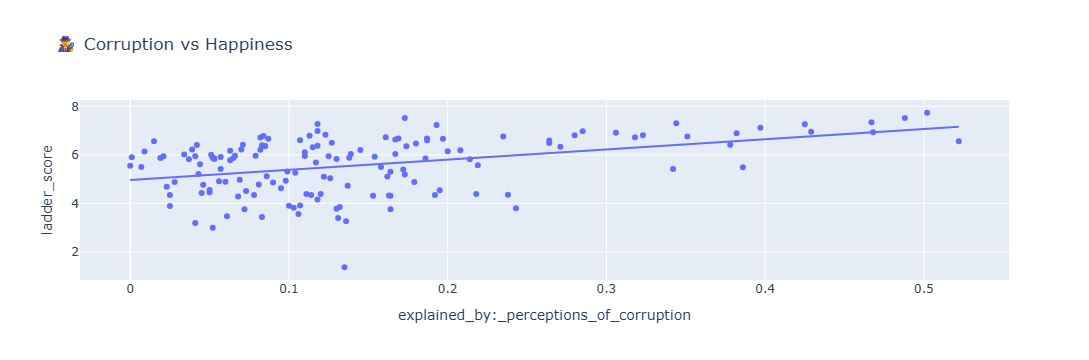

In [36]:
fig = px.scatter(df_latest,
                 x='explained_by:_perceptions_of_corruption',
                 y='ladder_score',
                 trendline='ols',
                 title='🕵️‍♂️ Corruption vs Happiness')

fig.show()


## ✅ 12️⃣ Cluster Countries

C:\Users\A Ebrahim\AppData\Local\Temp\ipykernel_26092\8360573.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



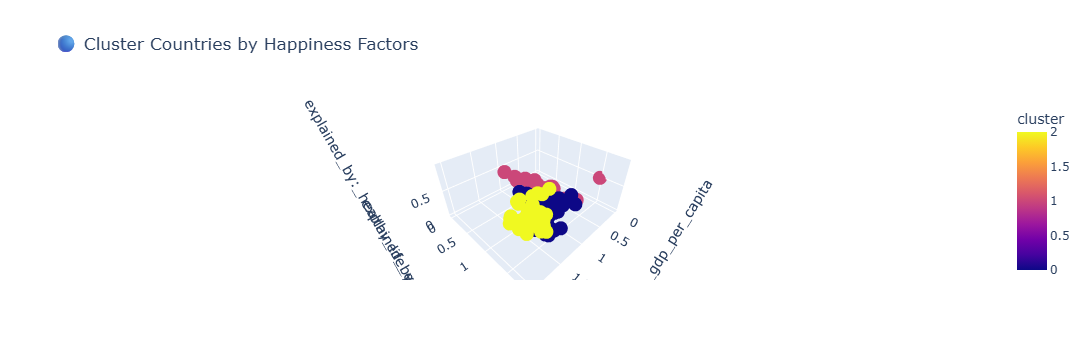

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features
X_cluster = df_latest[['explained_by:_log_gdp_per_capita',
                       'explained_by:_social_support',
                       'explained_by:_healthy_life_expectancy']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
df_latest['cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters
fig = px.scatter_3d(df_latest, 
                    x='explained_by:_log_gdp_per_capita',
                    y='explained_by:_social_support',
                    z='explained_by:_healthy_life_expectancy',
                    color='cluster',
                    hover_name='country_name',
                    title='🔵 Cluster Countries by Happiness Factors')

fig.show()


## ✅ 13️⃣ Animated Map

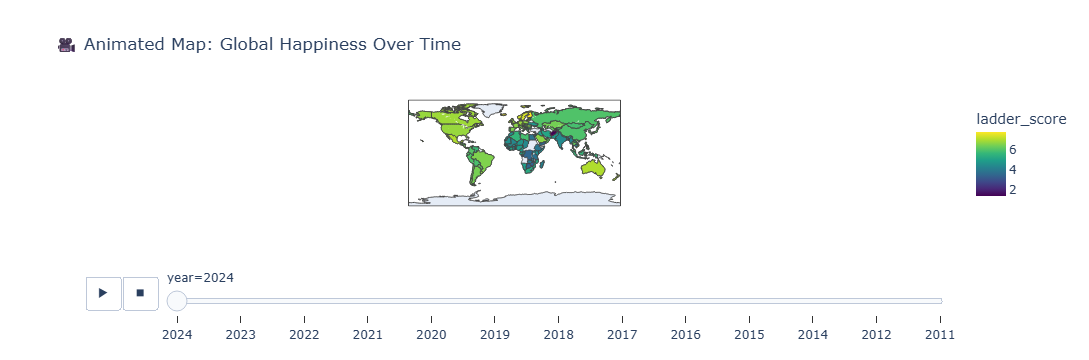

In [38]:
fig = px.choropleth(df,
                    locations='country_name',
                    locationmode='country names',
                    color='ladder_score',
                    animation_frame='year',
                    color_continuous_scale='Viridis',
                    title='🎥 Animated Map: Global Happiness Over Time')

fig.show()


## ✅ 14️⃣ Happiness vs Freedom Bubble Chart

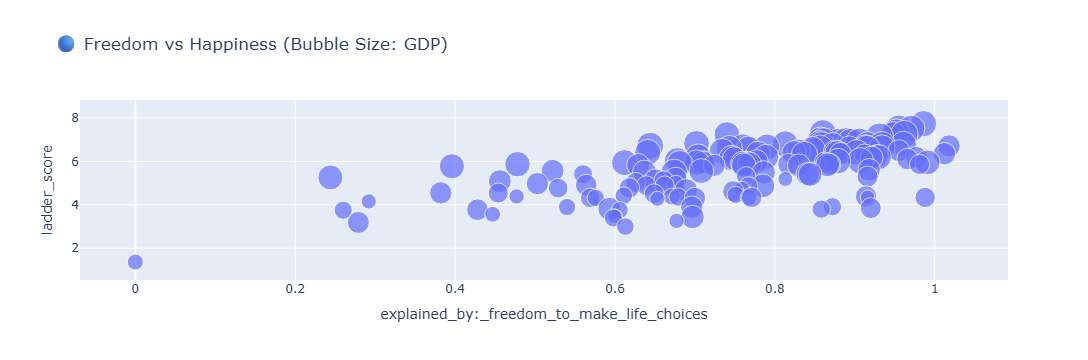

In [10]:
fig = px.scatter(df_latest,
                 x='explained_by:_freedom_to_make_life_choices',
                 y='ladder_score',
                 size='explained_by:_log_gdp_per_capita',
                 hover_name='country_name',
                 title='🔵 Freedom vs Happiness (Bubble Size: GDP)')

fig.show()



## ✅ 15️⃣ Country Profile Dashboard

In [4]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from ipywidgets import widgets, VBox, interactive_output

# List of countries for dropdown
countries = df['country_name'].unique()
countries = sorted(countries)

# Dropdown widget
country_selector = widgets.Dropdown(
    options=countries,
    description='Country:',
    value=countries[0],
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

def plot_happiness_profile(selected_country):
    # Filter data for the selected country
    df_country = df[df['country_name'] == selected_country].sort_values('year')
    
    # Latest year data for radar chart
    latest = df_country.iloc[-1]
    
    # Radar chart data (happiness factors)
    factors = [
        'explained_by:_log_gdp_per_capita',
        'explained_by:_social_support',
        'explained_by:_healthy_life_expectancy',
        'explained_by:_freedom_to_make_life_choices',
        'explained_by:_generosity',
        'explained_by:_perceptions_of_corruption'
    ]
    
    radar_values = [latest[f] for f in factors]
    
    fig_radar = go.Figure()
    fig_radar.add_trace(go.Scatterpolar(
        r=radar_values,
        theta=[f.replace('explained_by:_', '').replace('_', ' ').title() for f in factors],
        fill='toself',
        name=selected_country
    ))
    fig_radar.update_layout(
        polar=dict(radialaxis=dict(visible=True, range=[0, max(radar_values)*1.2])),
        title='Happiness Factors (Latest Year)',
        showlegend=False,
        height=400,
        width=400
    )
    
    # Line chart for happiness score trend
    fig_line = px.line(df_country, x='year', y='ladder_score', markers=True,
                       title='Happiness Score Over Years')
    fig_line.update_layout(height=400, width=600, yaxis_title='Happiness Score')
    
    # Bar chart for rank over years (lower rank = better)
    fig_bar = px.bar(df_country, x='year', y='rank',
                     title='Happiness Rank Over Years (Lower is Better)',
                     labels={'rank': 'Rank'})
    fig_bar.update_layout(height=400, width=600, yaxis_autorange='reversed')
    
    # Show plots side-by-side using subplot (or just show separately in notebook)
    fig_radar.show()
    fig_line.show()
    fig_bar.show()

out = interactive_output(plot_happiness_profile, {'selected_country': country_selector})

VBox([country_selector, out])


## ✅ Final Summary

This project explored how different factors like **GDP**, **Social Support**, **Health**, **Freedom**, **Generosity**, and **Corruption** shape global happiness.  
Interactive and dynamic visuals help policymakers and students understand well-being globally.
